In [1]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import platform

In [44]:
# 시각화를 위한 한글 폰트 표시 작업
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
else:
    rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
wine1 = pd.read_csv('C:/Users/igksj/Desktop/분반 자료/wine1.csv', sep='\t')
wine2 = pd.read_csv('C:/Users/igksj/Desktop/분반 자료/wine2.csv',sep='\t')

In [6]:
intersection_idx = list(set(wine1['index']).intersection(wine2['index']))

wine = wine1.loc[
    wine1['index'].apply(lambda x: x in intersection_idx)].copy()

wine = wine.sort_values(by = 'index').reset_index(drop=True)

print(wine.info())
print(wine.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    6497 non-null   int64  
 1   alcohol  6497 non-null   float64
 2   class    6493 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 152.4 KB
None
   index  alcohol  class
0      1      9.4    0.0
1      2      9.8    0.0
2      4      9.8    0.0
3      5      9.4    0.0
4      6      9.4    NaN


In [7]:
df=pd.merge(wine, wine2)

df['sugar'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[0] if pd.notnull(x) else x)

df['PH'] = df['sugar_PH'].apply(
    lambda x: x.split('/')[1] if pd.notnull(x) else x)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     6497 non-null   int64  
 1   alcohol   6497 non-null   float64
 2   class     6493 non-null   float64
 3   sugar_PH  6497 non-null   object 
 4   sugar     6497 non-null   object 
 5   PH        6497 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 355.3+ KB


In [11]:
# index, sugar_PH 열 제거
df= df.drop(['index','sugar_PH'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   object 
 3   PH       6497 non-null   object 
dtypes: float64(2), object(2)
memory usage: 253.8+ KB


In [12]:
# object를 float64로 변환
for x in df.columns:
    if df[x].dtype=='object':
        df[x]=df[x].astype('float64')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6493 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

#  결측치를 0으로 채우기
df[df.select_dtypes(include=numerics).columns] =df[df.select_dtypes(include=numerics).columns].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   class    6497 non-null   float64
 2   sugar    6497 non-null   float64
 3   PH       6497 non-null   float64
dtypes: float64(4)
memory usage: 253.8 KB


In [15]:
df.head()

,alcohol,class,sugar,PH
0,9.4,0.0,1.9,3.51
1,9.8,0.0,2.6,3.20
2,9.8,0.0,1.9,3.16
3,9.4,0.0,1.9,3.51
4,9.4,0.0,1.8,3.51


<AxesSubplot:>

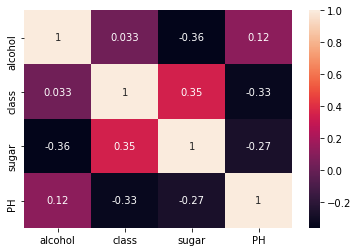

In [17]:
# 변수간의 상관계수 heatmap
sns.heatmap(df.corr(),annot=True)

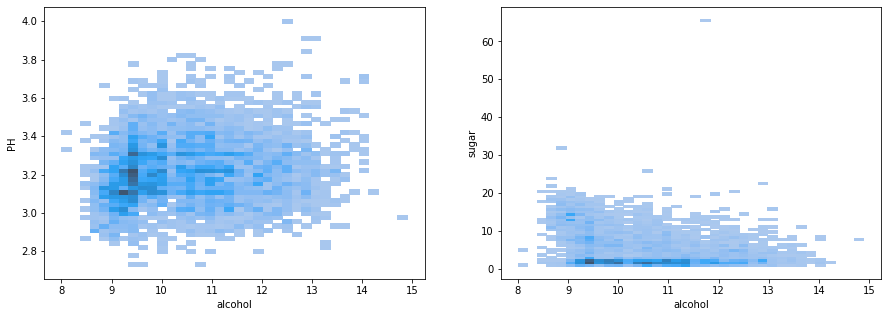

In [18]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(data=df,x='alcohol',y='PH',kde=True,ax=ax[0])
sns.histplot(data=df,x='alcohol',y='sugar',kde=True,ax=ax[1])
plt.show()

In [19]:
X_data = df[['alcohol','sugar','PH']]
y_data = df['class']

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score, roc_curve


train_x, test_x ,train_y, test_y = train_test_split(X_data, y_data, test_size=0.3,random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(4547, 3) (1950, 3) (4547,) (1950,)


In [21]:
scaler = StandardScaler()
scaler.fit(train_x)

train_scaled = scaler.transform(train_x)
test_scaled = scaler.transform(test_x)

In [22]:
lr = LogisticRegression()
lr.fit(train_scaled,train_y)

print(lr.score(train_scaled, train_y))
print(lr.score(test_scaled, test_y))

0.7849131295359578
0.782051282051282


In [26]:
# 정밀도, 재현율
pred = lr.predict(test_scaled)

print('accurary %2.3f'%accuracy_score(test_y,pred))
print('recall %2.3f'%recall_score(test_y,pred))
print('roc %2.3f'%roc_auc_score(test_y,pred))


accurary 0.782
recall 0.909
roc 0.641


In [34]:
count =0
for i in(pred-test_y):
    if i == 0:
        count+=1
print(count/len(pred))

0.782051282051282


In [36]:
# 새로운 new_X값도 스케일링하고 예측
# 위에 있는 작업을 모두 피클링 또는 dump해서 객체화시켜서 갖고 있게 됨
new_XX = np.array([
    [15,30,1.088]
])

#scaler.fit(new)
newX_scaled = scaler.transform(new_XX)
y_hat = lr.predict(newX_scaled)

print(y_hat[0])
# class가 1이면 화이트, 0이면 레드와인
classLabel = ['red_wine','white_wine']
print(classLabel[int(y_hat[0])])

print(lr.predict_proba(new_XX))

1.0
white_wine
[[0. 1.]]


In [37]:
import statsmodels.api as sm

logitreg = sm.Logit(train_y,train_scaled)
logitreg_fit = logitreg.fit()

results = logitreg_fit.summary()
results

Optimization terminated successfully.
         Current function value: 0.600723
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 4547
Model:                          Logit   Df Residuals:                     4544
Method:                           MLE   Df Model:                            2
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                -0.06815
Time:                        14:31:29   Log-Likelihood:                -2731.5
converged:                       True   LL-Null:                       -2557.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4129      0.036     11.585      0.000       0.343       0.483
x2             0.7253      0.039     18.625      0.000       0.649       0.802
x3            -0.5588      0.036    -15.487      0.000      -0.629      -0.488
==============================================================================
"""

In [38]:
np.exp(logitreg_fit.params)

x1    1.511203
x2    2.065313
x3    0.571909
dtype: float64

## 분류리포트와 혼돈행렬출력

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_y)

LogisticRegression()

In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_hat = lr.predict(test_scaled)
print(classification_report(test_y, y_hat,target_names=['red','white']))

              precision    recall  f1-score   support

         red       0.56      0.37      0.45       462
       white       0.82      0.91      0.86      1488

    accuracy                           0.78      1950
   macro avg       0.69      0.64      0.66      1950
weighted avg       0.76      0.78      0.77      1950



In [53]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y, lr.predict(test_scaled))
cm

array([[ 172,  290],
       [ 135, 1353]], dtype=int64)

In [54]:
import warnings
warnings.filterwarnings(action='ignore')

([<matplotlib.axis.YTick at 0x26776f8c1f0>,
 [Text(0, 0.5, '0(N)'), Text(0, 1.5, '1(P)')])

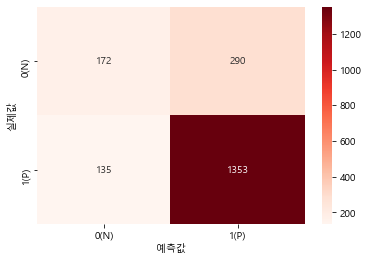

In [55]:
import matplotlib.pyplot as plt
pd.DataFrame(cm, index=['실제값(N)','실제값(P)'],columns=['예측값(N)','예측값(P)'])

sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Reds')
plt.xlabel('예측값')
plt.ylabel('실제값')
plt.xticks([0.5,1.5],['0(N)', '1(P)'])
plt.yticks([0.5,1.5],['0(N)', '1(P)'])

In [56]:
pd.DataFrame(cm, index=['실제값(N:0)','실제값(P:1)'], columns=['예측값(N:0)','예측값(P:1)'])

,예측값(N:0),예측값(P:1)
실제값(N:0),172,290
실제값(P:1),135,1353


In [57]:
tmp = []
pred = lr.predict(test_scaled)

for i, j in zip(pred,test_y):
    tmp.append(str(int(i))+str(int(j)))

tmpdf = pd.DataFrame({'y': test_y, 'y_hat': pred, '실제값/예측값':tmp})
tmpdf.groupby(['실제값/예측값']).count()

,y,y_hat
실제값/예측값,,
00,172,172
01,135,135
10,290,290
11,1353,1353


In [58]:
## 재현율을 높여봅니다.
# predict_proba 분류결정 예측 확률을 반환

pred_proba = lr.predict_proba(test_scaled)
pred  = lr.predict(test_scaled)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (1950, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.01762421 0.98237579]
 [0.00823836 0.99176164]
 [0.00322809 0.99677191]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.01762421 0.98237579 1.        ]
 [0.00823836 0.99176164 1.        ]
 [0.00322809 0.99677191 1.        ]]


In [62]:
# 정밀도 재현율 계산 함수
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print(' 정밀도: {0:.4f}, 재현율: {1:.4f}'.format(precision ,recall))
    

In [63]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold_list = [0.3,0.5,0.8]

for custom_threshold in custom_threshold_list:
    print('------ custom_threshold_list----- %2.1f' % custom_threshold)
    # predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
    pred_proba = lr.predict_proba(test_scaled)
    pred  = lr.predict(test_scaled)

    pred_proba_1 = pred_proba[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
    custom_predict = binarizer.transform(pred_proba_1)
    custom_predict    

    get_clf_eval(test_y,custom_predict)

------ custom_threshold_list----- 0.3
오차 행렬
[[  38  424]
 [  40 1448]]
 정밀도: 0.7735, 재현율: 0.9731
------ custom_threshold_list----- 0.5
오차 행렬
[[ 172  290]
 [ 135 1353]]
 정밀도: 0.8235, 재현율: 0.9093
------ custom_threshold_list----- 0.8
오차 행렬
[[412  50]
 [560 928]]
 정밀도: 0.9489, 재현율: 0.6237


### 랜덤포레스트

In [87]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
start = time.time()

RF_params = {
    'n_estimators': [50,100,150,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [1,2,3,5],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 5, 10]}

wine_RF_models = GridSearchCV(
        RandomForestRegressor(random_state=42), param_grid=RF_params, n_jobs=-1
        ).fit(train_scaled,train_y).best_estimator_
print(f"걸린시간 : {np.round(time.time() - start,3)}초") # 현재시간 – 시작시간(단위 초)

걸린시간 : 100.814초


In [ ]:
print(classification_report(test_y, pred_RF,target_names=['red','white']))

## kaggle api 접속 및 데이터 가져오기

In [75]:
# 캐글 데이터셋
!pip install kaggle --upgrade
!pip install kaggle

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73053 sha256=0082857feb1c241fa599c8583ecc12318c659ae299b9d97207f240c85e083333
  Stored in directory: c:\users\igksj\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


In [76]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = 'kimsunijin'
os.environ['KAGGLE_KEY'] = 'e07199c8870d405e21c6ae35d3ad8db1'

In [77]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009


  0%|          | 0.00/25.6k [00:00<?, ?B/s]
100%|██████████| 25.6k/25.6k [00:00<00:00, 307kB/s]


In [80]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('C:/Workspace/분석데이터활용/pandasData분석/data/zip')

In [81]:
import zipfile
fantasy_zip = zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'C:/Workspace/분석데이터활용/pandasData분석/data/zip')

#fantasy_zip.close()

'C:\\Workspace\\분석데이터활용\\pandasData분석\\data\\zip\\winequality-red.csv'

In [82]:
import pandas as pd
from glob import glob
df = pd.read_csv(glob('C:/Workspace/분석데이터활용/pandasData분석/data/zip/*.csv')[0])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
